# Experimento: Atividade 1 - Etapa 4 - Sem DL.

[Proposta On-line](https://docs.google.com/document/d/e/2PACX-1vQQ2A2PZbzVLz7PA0amF7gXN4tMSoGMXbZGpYphJNjSk158CR7jZ9gQWJ12U99xalHuQvSDfF022ypu/pub)

Utilizar modelos pré-treinados de aprendizagem profunda para identificação de segmentos de áudio com deglutições

## Lista de boas deglutições

In [4]:
import os
import glob
from IPython.display import Image, Audio, display

bons = [os.path.join('dataset/MP3/',os.path.basename(a).replace('.png','.mp3')) for a in glob.glob('Bons/*.png')]
for b in bons:
    display(b)
    display(Audio(b))

'dataset/MP3/a00028.mp3'

'dataset/MP3/a00073.mp3'

'dataset/MP3/a00083.mp3'

'dataset/MP3/a00111.mp3'

'dataset/MP3/a00112.mp3'

'dataset/MP3/a00115.mp3'

'dataset/MP3/a00133.mp3'

'dataset/MP3/a00180.mp3'

'dataset/MP3/a00183.mp3'

'dataset/MP3/a00376.mp3'

'dataset/MP3/a00393.mp3'

'dataset/MP3/a00397.mp3'

'dataset/MP3/a00443.mp3'

## Extraindo blocos de audio para análise

100%|██████████| 13/13 [00:00<00:00, 57.52it/s]


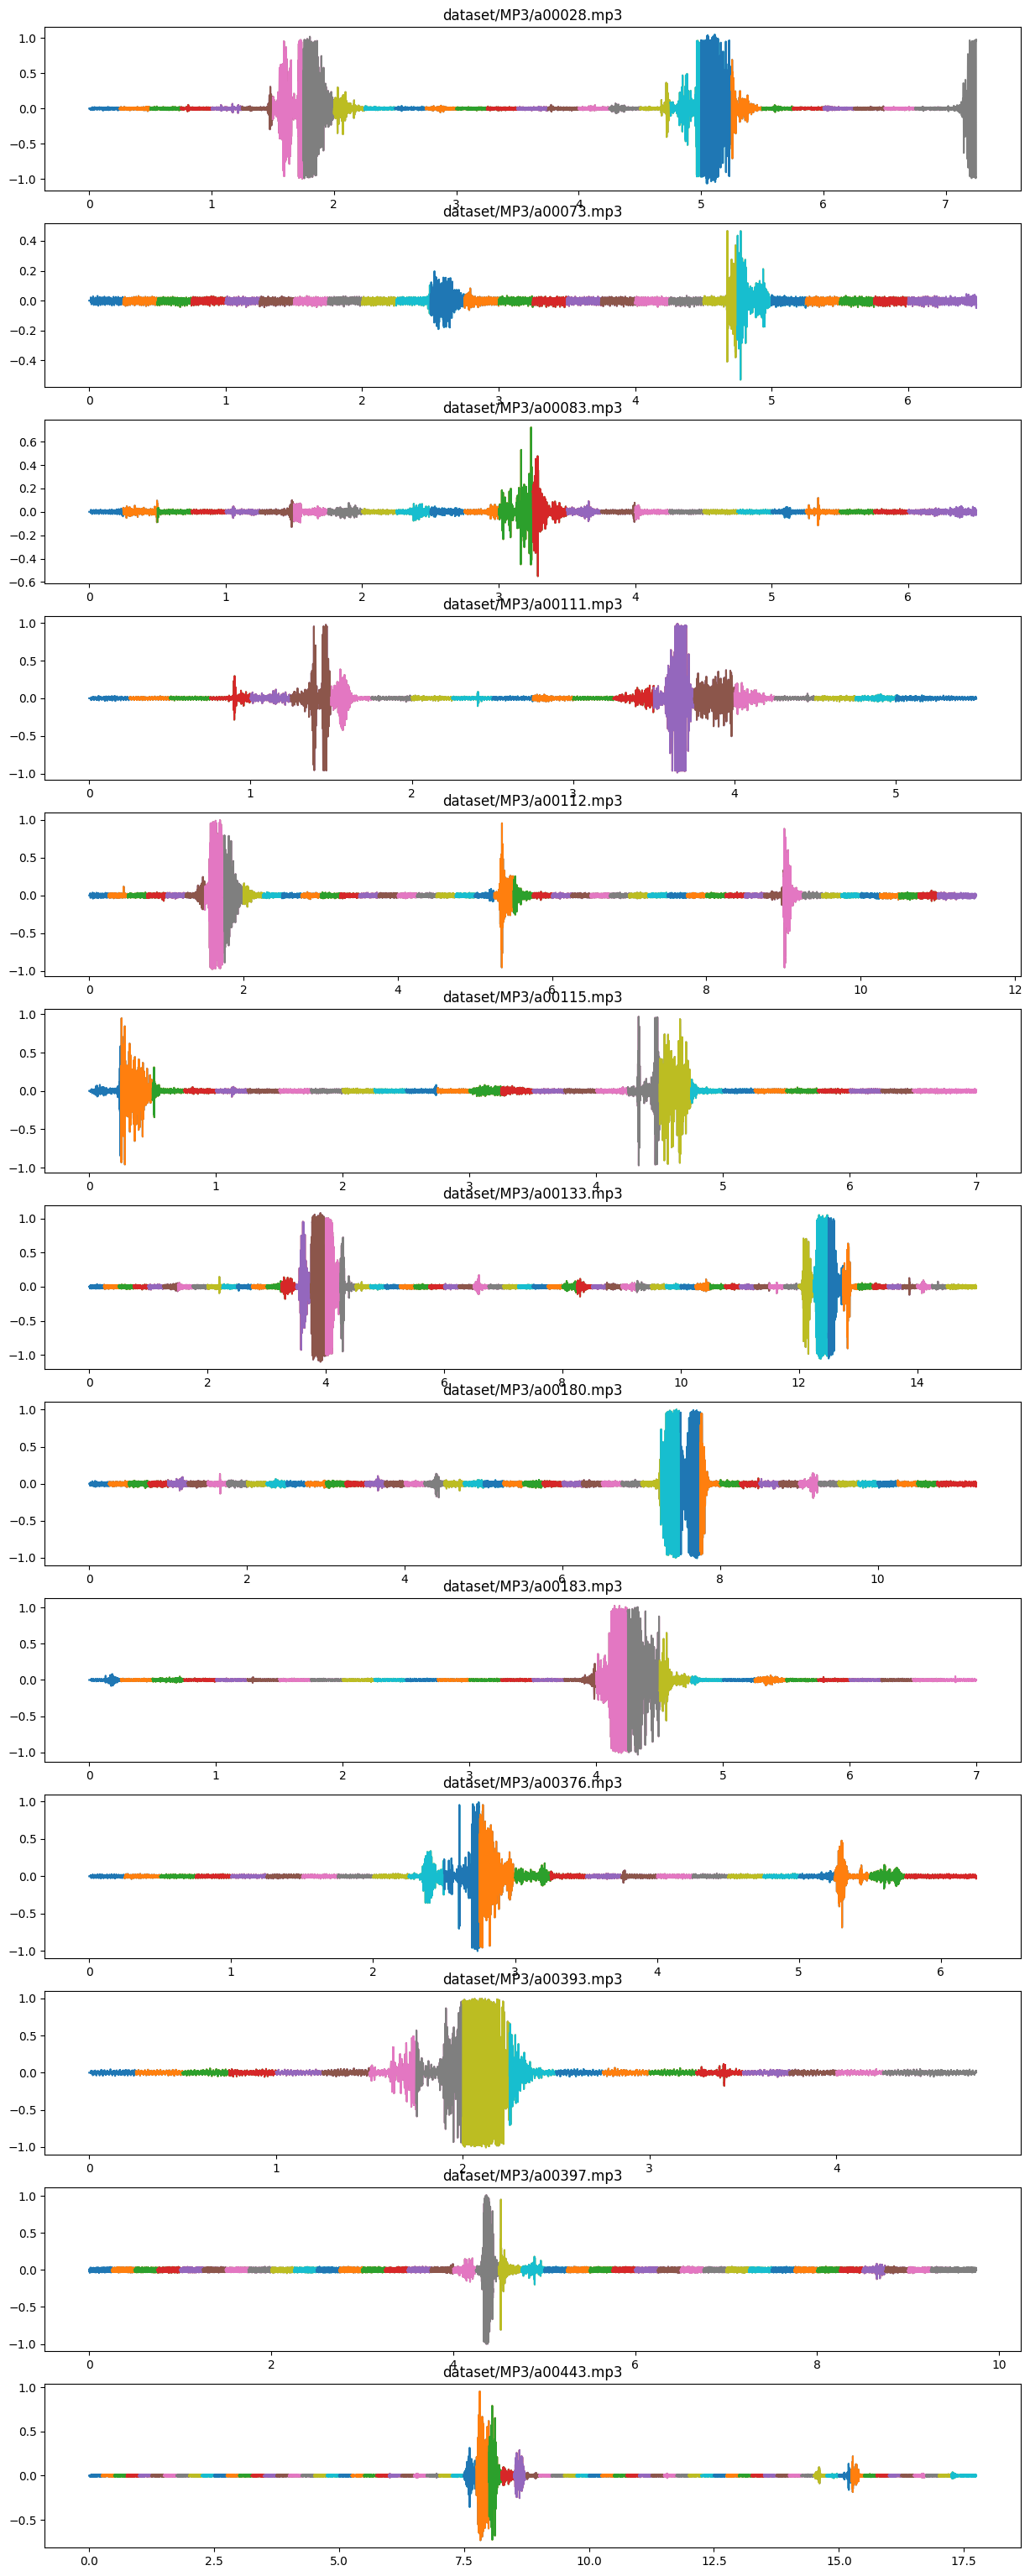

In [43]:
import librosa

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

dados = []
for b in tqdm(bons):
    nome = os.path.basename(b)[:-4]
    y, sr = librosa.load(b)
    x = np.arange(len(y))/sr

    janela = int(0.5 * sr)
    passo = int(0.25 * sr)

    linha = []
    for i in range(0, len(y), int(passo)):
        max = i + janela
        if max > len(y):
            break
        linha.append((x[i:max], y[i:max]))    
    dados.append(linha)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        ax[i].plot(x, y)
plt.show()

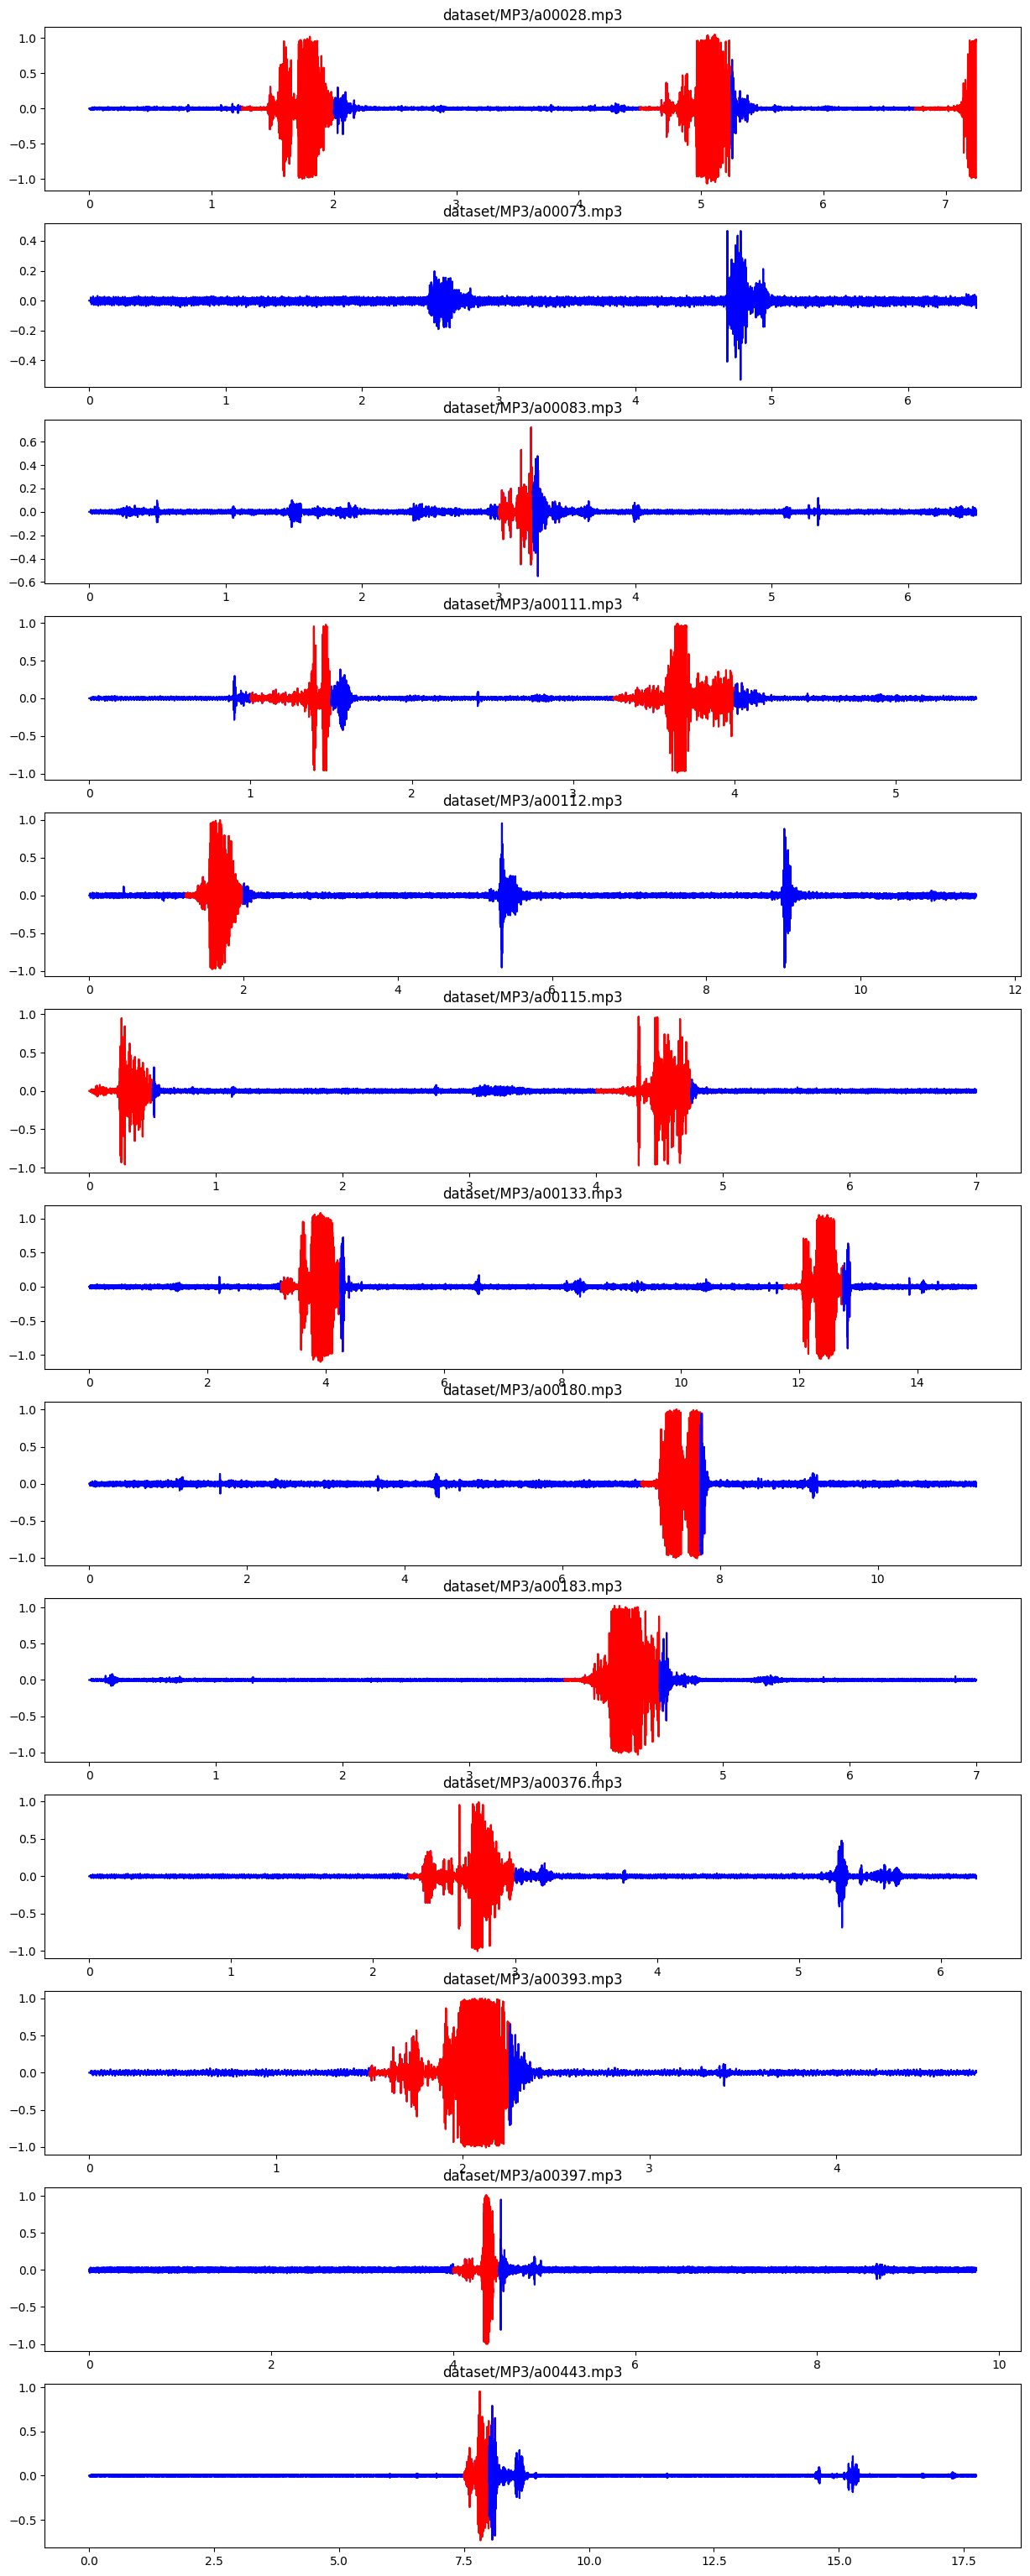

In [50]:
# detector de anomalias
from sklearn.ensemble import IsolationForest

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = IsolationForest(contamination=0.1)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

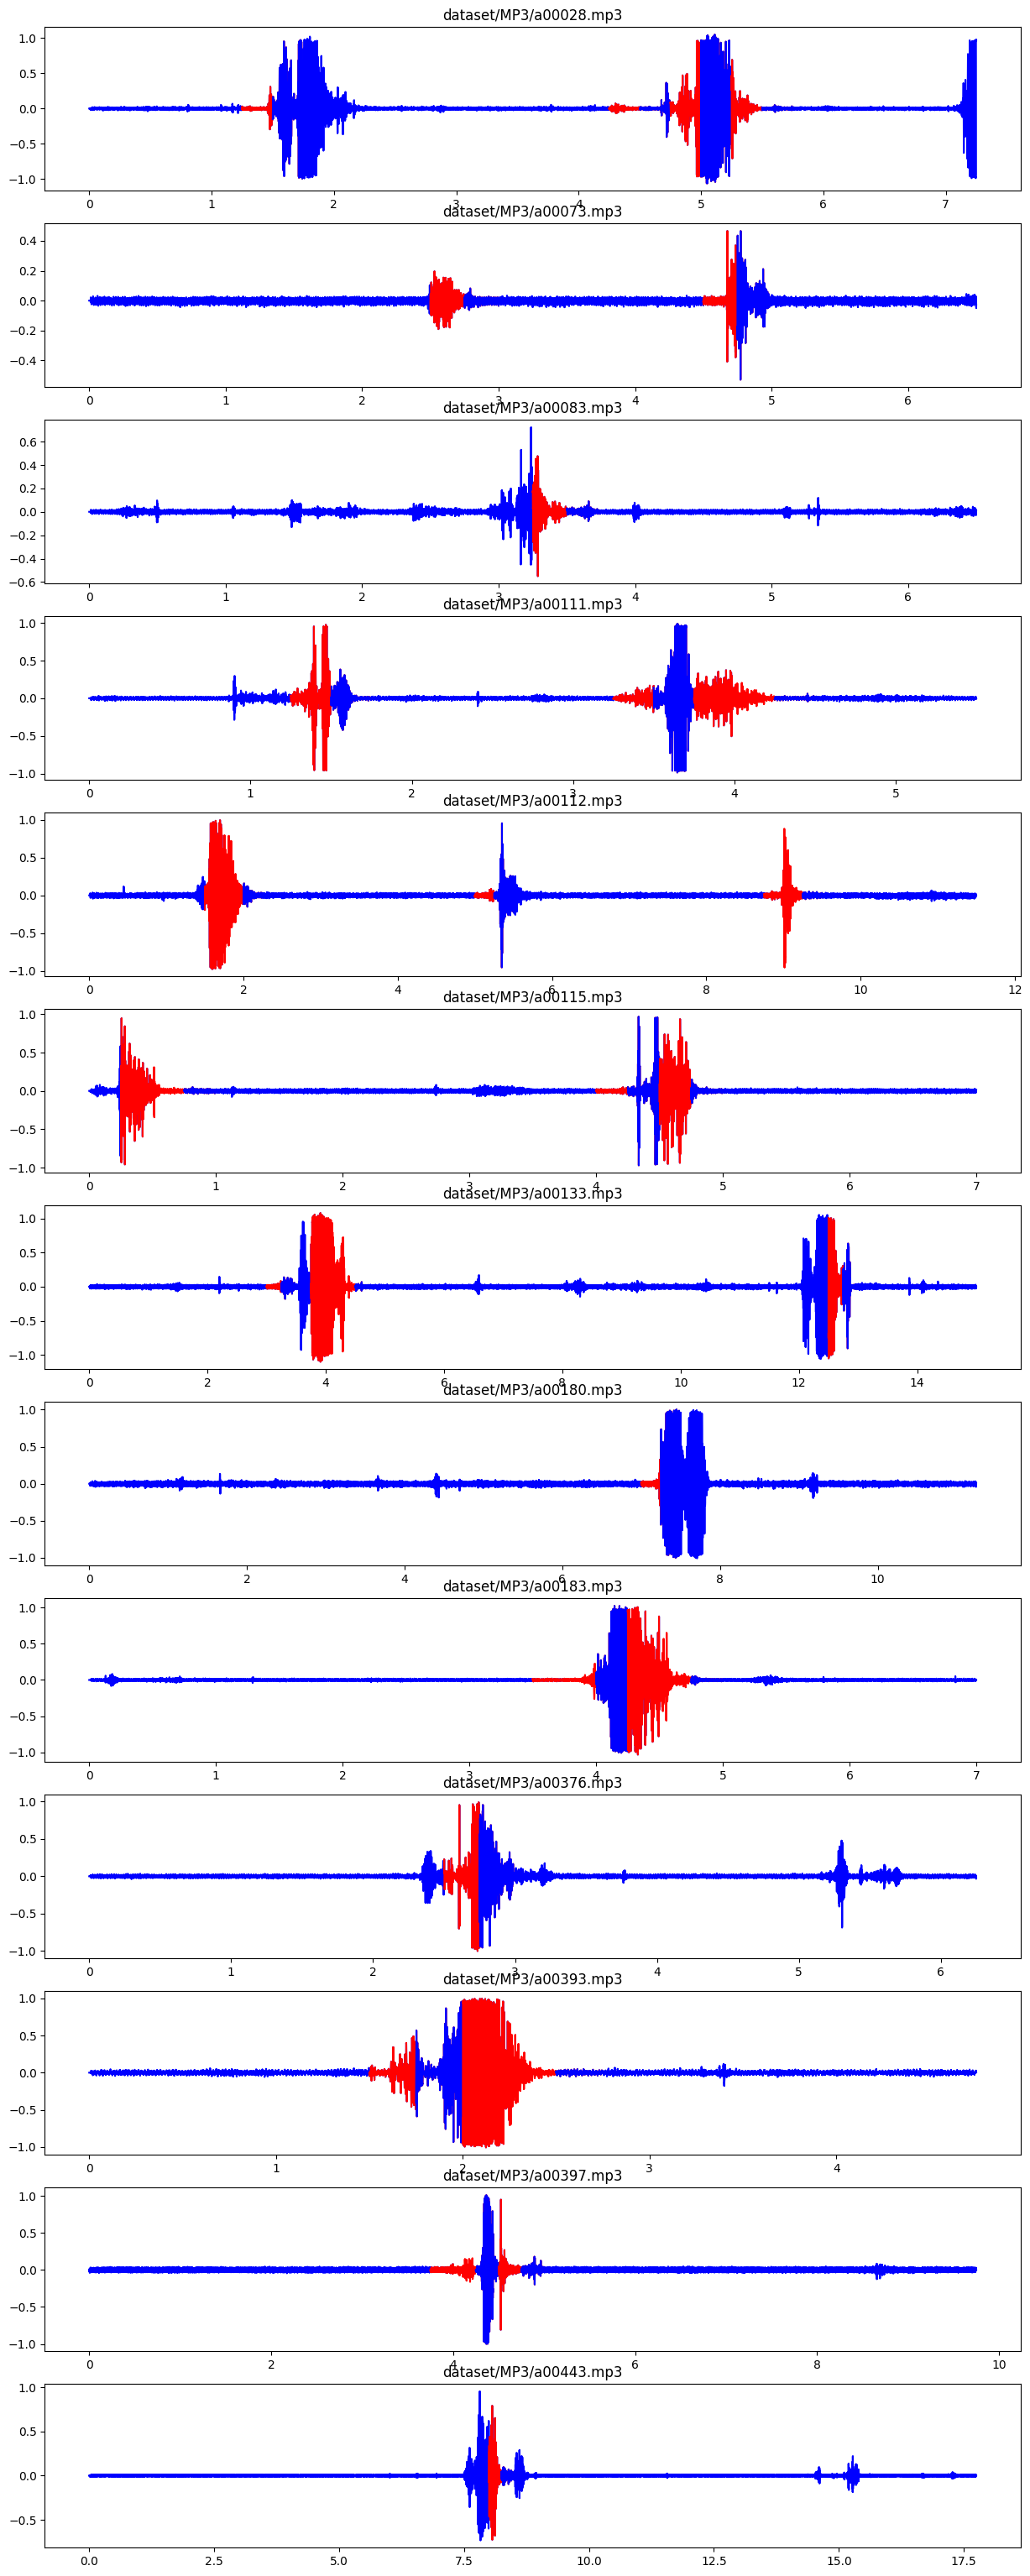

In [51]:
# detector de anomalias
from sklearn.svm import OneClassSVM

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X)
ano = clf.predict(X)
ano = (ano == -1)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color='red' if ano[n] else 'blue')
plt.show()

In [ ]:
from sklearn.

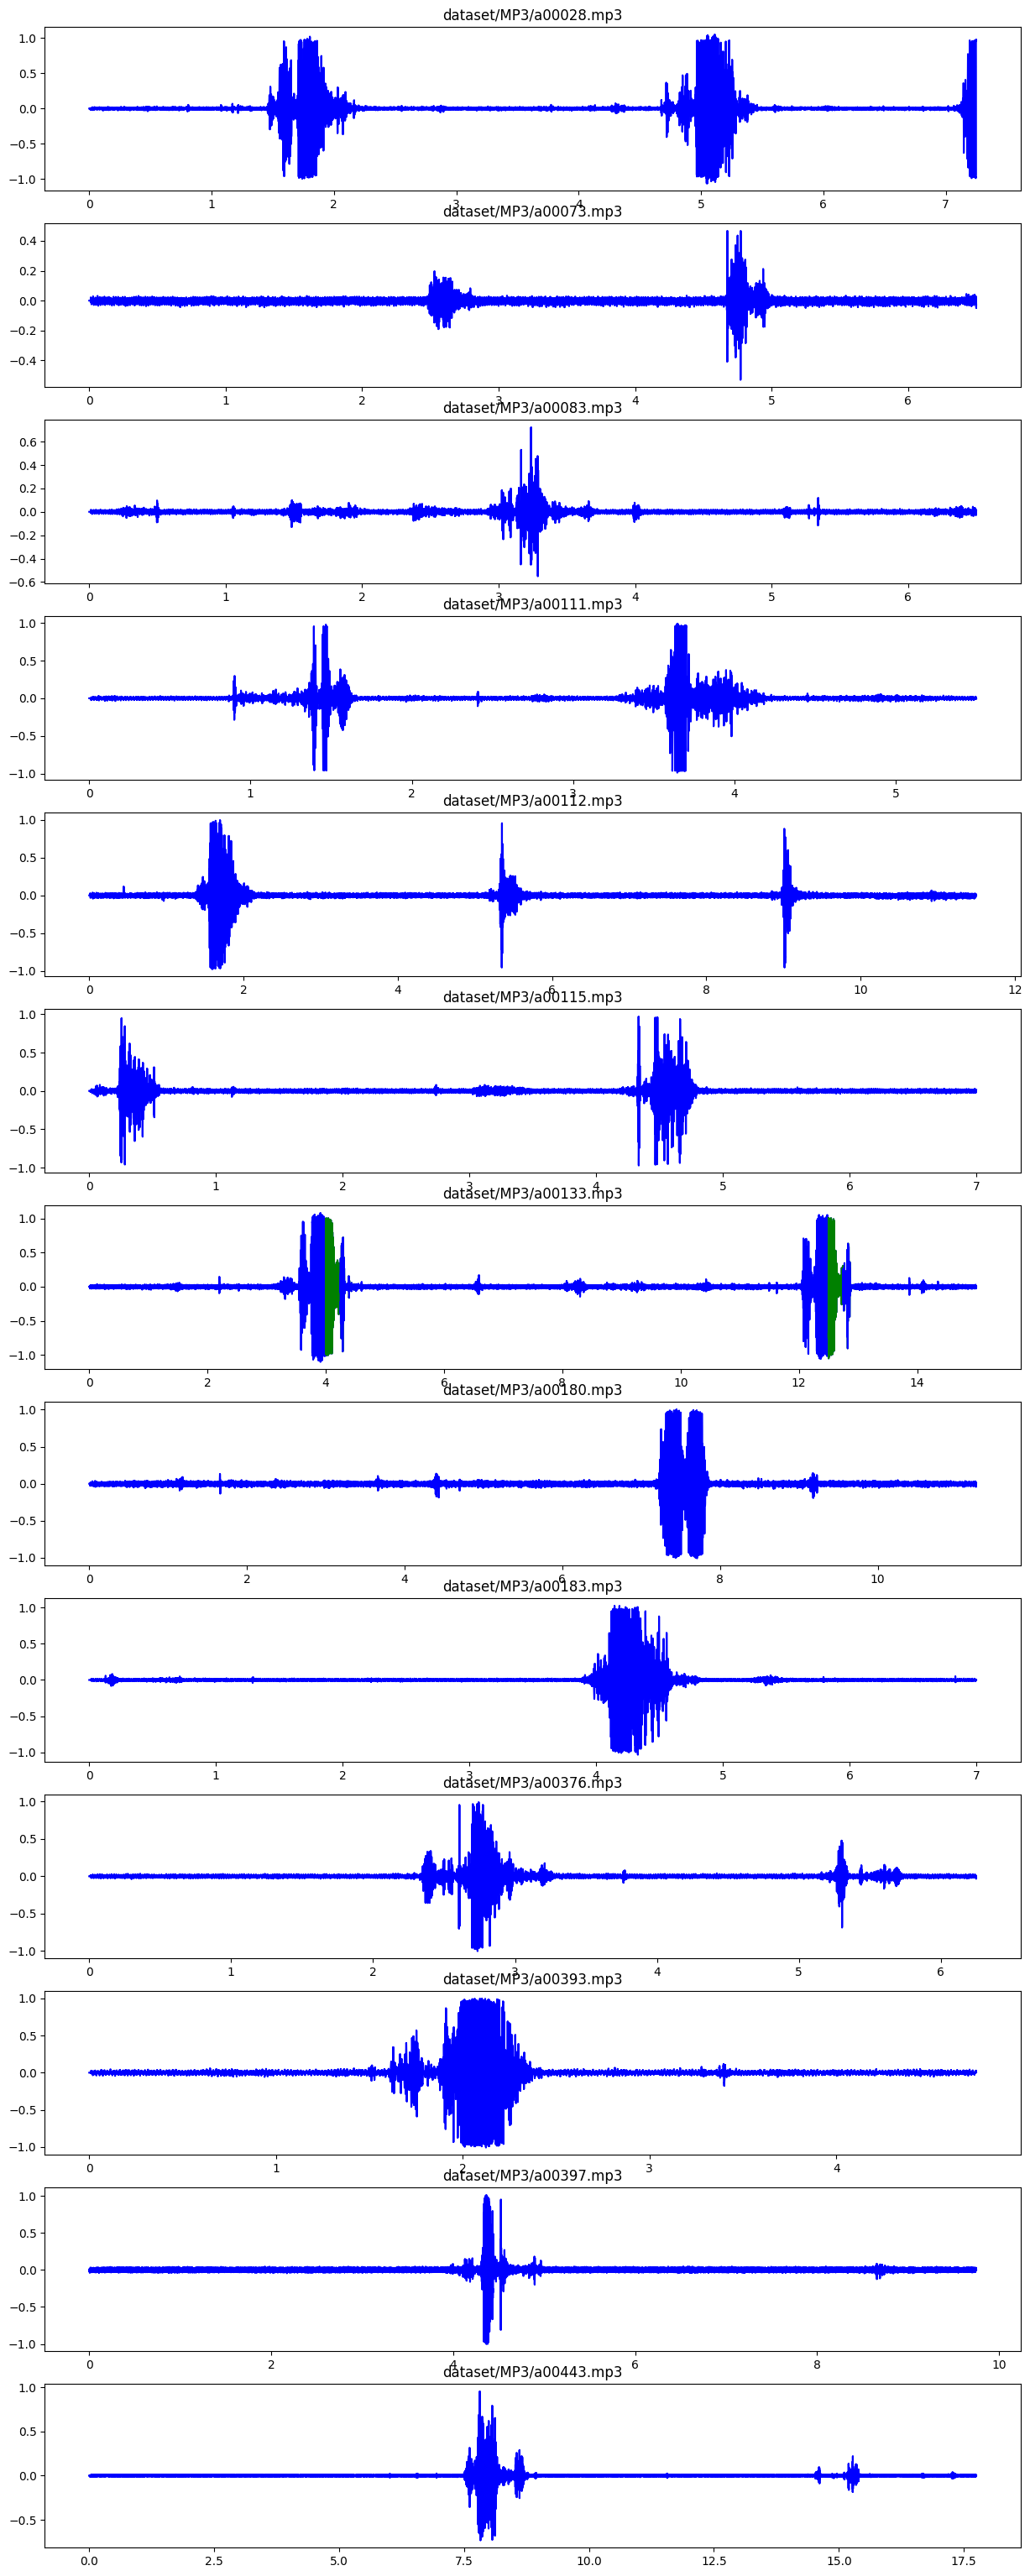

In [52]:
# agrupamento de dados
from sklearn.cluster import KMeans

X = []
for i, linha in enumerate(dados):
    for _, y in linha:
        X.append(y)

clf = KMeans(n_clusters=2, random_state=42)
clf.fit(X)
grupo = clf.predict(X)

fig, ax = plt.subplots(len(dados), 1, figsize=(15, 3*len(dados)))
n=-1
cores = ['b','g','r','c','m','y','k']
for i, linha in enumerate(dados):
    ax[i].set_title(bons[i])
    for x, y in linha:
        n+=1
        ax[i].plot(x, y, color=cores[grupo[n]])

plt.show()